<a href="https://colab.research.google.com/github/adamzki99/nlp-zlatan/blob/main/nlp_zlatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connect to Google Drive

This notebook is designed to be used together with Google Colab. We start by connecting the notebook to our personal Google Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Be careful to check the you have the same filepath for the dataset in your drive

In [2]:
%cd /content/drive/MyDrive/nlp-datasets/wizard_of_wikipedia

/content/drive/MyDrive/nlp-datasets/wizard_of_wikipedia


## Reading the dataset

The dataset used is very nested, hard to navigate and just difficult to wrap ones head around. So it is recommended to see this [resource](https://parl.ai/projects/wizard_of_wikipedia/) to get a better undersatnding.

In [3]:
import json

with open('data.json', 'r') as file:
    json_data = file.read()
    data = json.loads(json_data)

print('Datatype:', type(data))

Datatype: <class 'list'>


Use the following keys to double check with the [resource](https://parl.ai/projects/wizard_of_wikipedia/) that you have loaded in the right dataset.

In [5]:
data[0]['dialog'][0].keys()

dict_keys(['speaker', 'text', 'checked_sentence', 'checked_passage', 'retrieved_passages', 'retrieved_topics'])

## Data exploration

How big is the dataset, and how does it look?

In [6]:
len(data)

22311

In [7]:
data[:5]

[{'chosen_topic': 'Science fiction',
  'persona': 'i enjoy movies about aliens invading the earth.',
  'wizard_eval': 5,
  'dialog': [{'speaker': '0_Wizard',
    'text': "I think science fiction is an amazing genre for anything. Future science, technology, time travel, FTL travel, they're all such interesting concepts.",
    'checked_sentence': {'chosen_Science_fiction_0': 'Science fiction (often shortened to SF or sci-fi) is a genre of speculative fiction, typically dealing with imaginative concepts such as futuristic science and technology, space travel, time travel, faster than light travel, parallel universes, and extraterrestrial life.'},
    'checked_passage': {'chosen_topic_0_Science_fiction': 'Science fiction'},
    'retrieved_passages': [{'Hyperspace (science fiction)': ['Hyperspace is a faster-than-light (FTL) method of traveling used in science fiction.',
       'It is typically described as an alternative "sub-region" of space co-existing with our own universe which may be 

In [8]:
data[0].keys()

dict_keys(['chosen_topic', 'persona', 'wizard_eval', 'dialog', 'chosen_topic_passage'])

In [9]:
data[0]['chosen_topic_passage']

['Science fiction (often shortened to SF or sci-fi) is a genre of speculative fiction, typically dealing with imaginative concepts such as futuristic science and technology, space travel, time travel, faster than light travel, parallel universes, and extraterrestrial life.',
 'Science fiction often explores the potential consequences of scientific and other innovations, and has been called a "literature of ideas".',
 'It usually avoids the supernatural, unlike the related genre of fantasy.',
 'Historically, science-fiction stories have had a grounding in actual science, but now this is only expected of hard science fiction.',
 'Science fiction is difficult to define, as it includes a wide range of subgenres and themes.',
 'Hugo Gernsback, who suggested the term "scientifiction" for his "Amazing Stories" magazine, wrote: "By \'scientifiction\' I mean the Jules Verne, H. G. Wells and Edgar Allan Poe type of story—a charming romance intermingled with scientific fact and prophetic vision..

### Dictionary keys of Wizard

In [10]:
data[0]['dialog'][0].keys()

dict_keys(['speaker', 'text', 'checked_sentence', 'checked_passage', 'retrieved_passages', 'retrieved_topics'])

### Dictionary keys of Apprentice

In [11]:
data[0]['dialog'][1].keys()

dict_keys(['speaker', 'text', 'retrieved_passages', 'retrieved_topics'])

### Dialog example

In [12]:
for i in range(10):
    print(i, ":", data[0]['dialog'][i]['text'])

0 : I think science fiction is an amazing genre for anything. Future science, technology, time travel, FTL travel, they're all such interesting concepts.
1 : I'm a huge fan of science fiction myself! 
2 : Awesome! I really love how sci-fi storytellers focus on political/social/philosophical issues that would still be around even in the future. Makes them relatable.
3 : I agree. One of my favorite forms of science fiction is anything related to time travel! I find it fascinating.
4 : It's not quite sci-fi, but my favorite version of time travel is in Harry Potter and the Prisoner of Azkaban. Breaks zero logical rules.
5 : And that's difficult to do when dealing with time travel. I actually haven't seen the latest Harry Potter movies. Guess it's time to check them out!
6 : If you really want a look at the potential negative consequences of scientific innovation, what you should check out is the TV show Fringe. Incredibly well written.
7 : Thank you for the suggestion, I will definitely c

### Exploring uniqe types

Exploring how many uniqe "chosen_topic"s, "persona"s and "wizard_eval"s there are in the dataset.

In [13]:
topics = []
personas = []
wizardEvals = []

for entry in data:

  topics.append(entry['chosen_topic'])
  personas.append(entry['persona'])
  wizardEvals.append(entry['wizard_eval'])

# Making the list containing only uniqe items
topics = list(set(topics))
personas = list(set(personas))
wizardEvals = list(set(wizardEvals))

print("topic:", len(topics), "persona:", len(personas), "wizard_eval:", len(wizardEvals))

topic: 1365 persona: 1557 wizard_eval: 7


#### "Wizard evals"

Why are there more than 5 different "wizard_eval"s? The paper only mentions a rating from 1-5. What are the other 2?

In [14]:
for entry in wizardEvals:
  print(wizardEvals[entry] )


0
1
2
3
4
5
-1


What's up with -1 and 0? In paper only ratings from 1 to 5 are mentioned.

How often does each rating occur in "wizard_eval"s? Visualize all the different instances in a histogram

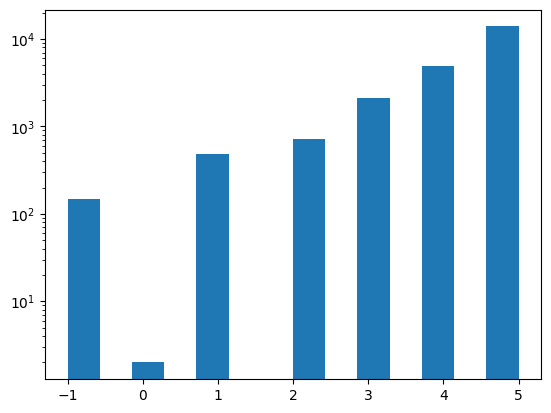

In [15]:
import matplotlib.pyplot as plt
import numpy as np

wEval = []

for entry in data:
    wEval.append(entry['wizard_eval'])

plt.hist(wEval, bins=2*len(set(wEval))) #the number of bins can probably be improved to look nicer
plt.yscale('log')
plt.show()

#### Topics

In [16]:
# What is a topic?

topics[:10]

['Johnny Cash',
 'Surfing',
 'Music festival',
 'National Hockey League',
 'Whittling',
 'Anne of Green Gables',
 'Welder',
 'Foster care',
 'Amateur geology',
 'Human cannibalism']

#### Personas

In [17]:
# What is a persona?

personas[:10]

['i like to invest in the stock market.',
 'i am a mother of two.',
 'my father was a member of the communist party.',
 'i love to watch ted talks.',
 'i have a george foreman grill at home.',
 'i like to bake pies.',
 'i have my own salon.',
 'i wish i could live in iceland.',
 'i am in a motorcycle club.',
 'i am allergic to milk.']

## all-MiniLM-L6-v2

This implementation is based on the all-MiniLM-L6-v2 model which is available from [Huggingface](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2).

The all-MiniLM-L6-v2 is a sentence-transformers model. It maps sentences & paragraphs to a 384 dimensional dense vector space and can be used for tasks like clustering or semantic search. This is a later model compared to the one showed in one of the tutorials, but is used more or less in the same way.

We have selected to pick a BERT model as we wanted to explore the posibility of creating a "vector database". The use-case is as follows:

From a natural user input, we want to retrive the correct Wikipedia passage. So that the input from the user is as small as possible. 

The reduction of data input comes from the exlusion of topics etc..  

### Splitting the data

We split up the data into a 80/20 split. We use 80% of the original dataset to perform fine-tuing of the all-MiniLM-L6-v2, the rest is then used for validating the reslut.

We aim to have the model being able to search the vector-space with new input and still being able to find the correct Wiki-passage.

It is important to note that this is a best case scenario as the input is generated from text that is present in the Wiki-passage.

In [4]:
import pandas as pd

data_extract_train = {
    "chosen_topic": [],
    "speaker_passage": [],
    "checked_sentence": [],
    "chosen_topic_passage": []
}

data_extract_test = {
    "chosen_topic": [],
    "speaker_passage": [],
    "checked_sentence": [],
    "chosen_topic_passage": []
}

for i, conversation in enumerate(data):

  for j, dialog in enumerate(conversation['dialog']):    

    if "Wizard" in dialog['speaker']:

      checked_sentence = list(dialog['checked_sentence'].values())

      if "no_passages_used" not in checked_sentence:

        if j % 4 == 0:

          data_extract_test['chosen_topic'].append(conversation['chosen_topic'])
          data_extract_test['speaker_passage'].append(dialog['text'])
          data_extract_test['checked_sentence'].append(checked_sentence)
          data_extract_test['chosen_topic_passage'].append(conversation['chosen_topic_passage'])

        else:
      
          data_extract_train['chosen_topic'].append(conversation['chosen_topic'])
          data_extract_train['speaker_passage'].append(dialog['text'])
          data_extract_train['checked_sentence'].append(checked_sentence)
          data_extract_train['chosen_topic_passage'].append(conversation['chosen_topic_passage'])

extract_train_df = pd.DataFrame(data_extract_train)

extract_test_df = pd.DataFrame(data_extract_test)

extract_test_df

,chosen_topic,speaker_passage,checked_sentence,chosen_topic_passage
0,Science fiction,I think science fiction is an amazing genre fo...,[Science fiction (often shortened to SF or sci...,[Science fiction (often shortened to SF or sci...
1,Science fiction,"It's not quite sci-fi, but my favorite version...",[The central premise for these stories oftenti...,[Science fiction (often shortened to SF or sci...
2,Romance (love),I don't know how to be romantic. I have troubl...,[Romance is the expressive and pleasurable fee...,[Romance is the expressive and pleasurable fee...
3,Romance (love),For sure. Romantic love is relative but usuall...,"[Romantic love is a relative term, but general...",[Romance is the expressive and pleasurable fee...
4,Romance (love),Good point. Romance is associated with perfect...,"[This feeling is associated with, but does not...",[Romance is the expressive and pleasurable fee...
...,...,...,...,...
25983,Kendrick Lamar,Kendrick Lamar is great! He is a rapper,"[Kendrick Lamar Duckworth (born June 17, 1987)...","[Kendrick Lamar Duckworth (born June 17, 1987)..."
25984,Kendrick Lamar,"It is not, but he is very acclaimed in the gen...","[His critically acclaimed third album ""To Pimp...","[Kendrick Lamar Duckworth (born June 17, 1987)..."
25985,Skiing,I knew skiing was a winter sport but I never t...,"[Skiing can be a means of transport, a recreat...","[Skiing can be a means of transport, a recreat..."
25986,Skiing,It seems that it may also have been practiced ...,[Although modern skiing has evolved from begin...,"[Skiing can be a means of transport, a recreat..."


### Reducing the size

The size of the dataset is too big for the amount of available VRAM on the GPU. Therefor we need to reduce the size of the extracted dataset.

We also found that using more data will just result in overfitting the model.

In [5]:
testing_size = len(extract_test_df.index)*0.035
testing_size = int(testing_size)

training_size = len(extract_train_df.index)*0.035
training_size = int(training_size)

print("Ratio %:", testing_size/training_size * 100)

Ratio %: 37.82771535580524


In [6]:
extract_train_df = extract_train_df.sample(training_size)
extract_train_df

,chosen_topic,speaker_passage,checked_sentence,chosen_topic_passage
18750,Ozark Trail (hiking trail),"There must be, people go there to bike, camp, ...","[The Ozark Trail is a hiking, backpacking, and...","[The Ozark Trail is a hiking, backpacking, and..."
41082,Florida,Florida has the longest coastline in the conti...,[Florida has the longest coastline in the cont...,"[Florida (; Spanish for ""land of flowers"") is ..."
30321,Giant panda,I have not ever seen one in person. But appare...,[Animal Planet L!VE is an online content chann...,"[The giant panda (""Ailuropoda melanoleuca"", ""b..."
48347,Summer camp,Yes and they are heading to camp and will be k...,[Children and adolescents who attend summer ca...,[Summer camp is a supervised program for child...
32520,Cat,Well I know that there is more than seventy di...,[There are more than seventy cat breeds recogn...,"[The domestic cat (""Felis silvestris catus"" or..."
...,...,...,...,...
43403,University of Alabama,they have the only publicly supported law scho...,[The only publicly supported law school in the...,[The University of Alabama (Alabama or UA) is ...
30809,Taco,And the best thing about a taco is that it can...,[A taco is generally eaten without utensils an...,[A taco is a traditional Mexican dish composed...
55072,Running,"Well, years ago when our ancestors would go ru...",[It is assumed that the ancestors of humankind...,[Running is a method of terrestrial locomotion...
36816,Granny Smith,"Blue is mine, though they go from green to yel...",[They go from being completely green to turnin...,[The Granny Smith is a tip-bearing apple culti...


In [7]:
extract_test_df = extract_test_df.sample(testing_size)
extract_test_df

,chosen_topic,speaker_passage,checked_sentence,chosen_topic_passage
22368,Internet access,Yes it is amazing how much even cell phones ha...,"[Today, the company still provides dial-up Int...",[Internet access is the ability of individuals...
1714,Sleep,I was thinking more along the lines of narcole...,[Narcolepsy is a long-term neurological disord...,[Sleep is a naturally recurring state of mind ...
16422,Grocery store,"I really love to go grocery shopping, especial...",[Small grocery stores that mainly sell fruits ...,[A grocery store is a retail store that primar...
6964,Chocolate,LOL! The earliest documented use of chocolate ...,[The earliest evidence of use traces to the Ol...,"[Chocolate is a typically sweet, usually brown..."
917,Yellow,"Yes, It is used in painting and color printing",[It is a primary color in subtractive color sy...,[Yellow is the color between green and orange ...
...,...,...,...,...
5752,Marriage,Marriages differ between cultures and religion...,[The definition of marriage varies around the ...,"[Marriage, also called matrimony or wedlock, i..."
1823,Sewing,High-quality tailoring is my favorite hobby. I...,[Fine hand sewing is a characteristic of high-...,[Sewing is the craft of fastening or attaching...
1992,Red hair,I have red hair - and love being one of the 1-...,[Red hair (or ginger hair) occurs naturally in...,[Red hair (or ginger hair) occurs naturally in...
11666,Sleep,That's definitely a good theory. They do typic...,[Dreams mainly occur in the rapid-eye movement...,[Sleep is a naturally recurring state of mind ...


### Using the model


In [8]:
%pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.0 MB/s eta 0:00:00


In [9]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')


In order to use the model we need to construct sentence pairs. These pairs consists of a "user-input" and a sentence from the Wiki-passage

As stated earlier, the "user-input" is a genereated human-like input. The input from is genereated from the same sentence as the Wiki-passage which it is matched with. 

We note that this isn't the best case senario, as it can be interperted as the dataset is traning it self and creates a circle dependence. But we see it as being a "optimal" scenario instead.

In [10]:
def data_division(dataframe, sample_size:int):

  selected_sentences = []
  selected_conversation_topics = []

  for c, row in dataframe.sample(sample_size).iterrows():
    
    selected_conversation_topics.append(row['chosen_topic'])

    for resp in row['checked_sentence']:
      pair = (row['speaker_passage'], resp)
      selected_sentences.append(pair)

  return selected_sentences, selected_conversation_topics

In [11]:
selected_sentences_training, conversation_topics_traning = data_division(extract_train_df, len(extract_train_df.index))

In [12]:
selected_sentences_training[0]

('Everything tastes better when grilled :) I love my hot dogs with mustard and onions',
 'Typical garnishes include mustard, ketchup, onions, mayonnaise, relish, coleslaw, cheese, chili, olives, and sauerkraut.')

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

# Move model to GPU
model.to(device)

cuda


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 384, padding_idx=0)
    (position_embeddings): Embedding(512, 384)
    (token_type_embeddings): Embedding(2, 384)
    (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-5): 6 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=384, out_features=384, bias=True)
            (key): Linear(in_features=384, out_features=384, bias=True)
            (value): Linear(in_features=384, out_features=384, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=384, out_features=384, bias=True)
            (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
    

### Using mean-pooling

Becasue of the variable-length of the input we need to transform the input into a fixed-length representation so we can pass it to our model for traning.

The process involves taking the average of all the token embeddings in the sequence. More or less, this is achieved by summing up the embeddings and dividing the sum by the total number of tokens in the sequence.

Note that mean-pooling does not consider the positional information or the relative importance of individual tokens within the sequence. In order to combat this we make use of a attetion mask inorder to highlight some importance in the embedding.

The **mean_pooling** function performs mean pooling on token embeddings while considering an attention mask for correct averaging. It takes *model_output* and *attention_mask* as inputs.

The function first extracts the token embeddings from *model_output*. It then expands the attention mask to match the dimensions of the token embeddings. The expanded mask is used to mask out the embeddings that should be ignored.

Next, the masked token embeddings are summed along the second dimension (axis 1) to obtain the sum of the embeddings for each token. The attention mask is also summed along the second dimension and clamped to avoid division by zero.

Finally, the masked token embeddings are divided by the clamped attention mask sum to compute the mean pooling. The resulting mean-pooled embeddings are returned.

In [14]:
#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

The embedding is performed in the same way as desrcibes in the documentation for the all-MiniLM-L6-v2 model. One step that has been left out is the normalizaiton of the embedding. 

The normalization whould provide a list of benefits, such as: improved training and stability, reducing dimensionality, alignment of embedding spaces.

The reason that we whould like to perform normalization is to have similarity of meaurements when evaluating the performance of the model.

In [15]:
def perform_embedding(documents:list, device, model):

  encoded_documents = tokenizer(documents, padding=True, truncation=True, return_tensors='pt')

  encoded_documents.to(device)
  with torch.no_grad():
      model_output_documents = model(**encoded_documents)

  # Perform pooling
  embedding = mean_pooling(model_output_documents, encoded_documents['attention_mask'])

  # Normalize embedding
  embedding = F.normalize(embedding, p=2, dim=1)

  return embedding

In [16]:
sentence_embeddings = perform_embedding(documents = selected_sentences_training, device = device, model = model)

### Visualizing Cluster with Hypertools

In order to get a better understanding of the dataset we will use Hypertools to transform the very high dimensional space into a something we can understand. 

We will generate a 3-dimensional wiev of the embeddings and color in correspondence to k-mean clusters. The amount of clusters corresponds to the amount of topics that is included in the dataset.

In [17]:
%pip install hypertools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=0423aa4f50448b67938eabca97955762503d708a701055df994708510a7720fd
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=fdf8e5eb9e61879a9db3fd7dd20270346d6c493096e0a8d5504f9a69550e0166
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


Number of clusters: 831


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/hypertools/plot/plot.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwargs[kwarg]=np.array(kwargs[kwarg])


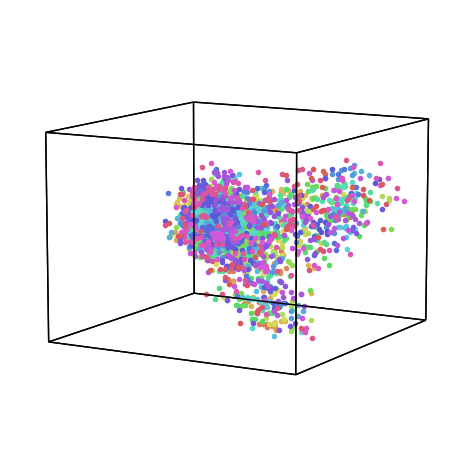

In [18]:
import hypertools as hyp

n_clusters = len(set(conversation_topics_traning))

print("Number of clusters:", n_clusters)

hyp.plot(sentence_embeddings.cpu().detach().numpy(), '.', n_clusters = n_clusters)

### Creating the index with the model output

In [19]:
%pip install hnswlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.7.0-cp310-cp310-linux_x86_64.whl size=2119867 sha256=bb34965d81ee3b73712b727cf1553d033abd57a5f7ce30de441c4a38caf89c49
  Stored in directory: /root/.cache/pip/wheels/8a/ae/ec/235a682e0041fbaeee389843670581ec6c66872db856dfa9a4
Successfully built hnswlib


In order to search the embedding vector space we perform **k-nearest neighbors** (KNN) query. This works by creating a index using hnswlib, this is to improve the efficiency of the search.

We then perform the embedding process on the query, which in our case is the *speaker_passage*, and calculates the absolute distance to the *k* closest elements in the index.

In [20]:
import hnswlib

# Create the HNSW index
index = hnswlib.Index(space='l2', dim=sentence_embeddings.shape[1])
index.init_index(max_elements=len(sentence_embeddings), ef_construction=200, M=16)

# Add sentence embeddings to the index
index.add_items(sentence_embeddings.cpu().numpy())

In [21]:
# Perform a similarity search
def search_embeddings(query:str, k, device, model):

  query_embedding = perform_embedding(documents=query, device=device, model=model)

  indexes, distances = index.knn_query(query_embedding.cpu(), k=k)

  return indexes[0], distances, query_embedding

Get a random speaker passage from the training dataset just to verify that we can use the model

In [22]:
random_message = list(extract_train_df.sample(1).to_dict()['speaker_passage'].values())[0]
message = [random_message]

message

['What is your favorite show? The BBC is a British public broadcaster.']

In [23]:
indexes, distances, query_embedding = search_embeddings(query=message, k=10, device=device, model=model)

print(indexes)

[ 724  110 2284 1255 1484 1995  292 1579 1708  421]


In [24]:
query_subset = []

for i, ind in enumerate(indexes):
  print("Distance:", distances[0][i], "\t", selected_sentences_training[ind][1])
  query_subset.append(selected_sentences_training[ind])

Distance: 0.13259034 	 The British Broadcasting Corporation (BBC) is a British public service broadcaster.
Distance: 1.2121311 	 Its headquarters are at Broadcasting House in London and it is the world's oldest national broadcasting organisation and the largest broadcaster in the world by number of employees.
Distance: 1.2376366 	 The Joe Rogan Experience is a free audio and video talk podcast hosted by American comedian, actor, sports commentator, and television host Joe Rogan.
Distance: 1.2433834 	 It has grown to become one of the world’s most popular podcasts, spawning a community of listeners around the globe.
Distance: 1.3062991 	 They are also used in competitive sports including, but not limited to, dressage, endurance riding, eventing, reining, show jumping, tent pegging, vaulting, polo, horse racing, driving and rodeo (See additional equestrian sports listed later in this article for more examples).
Distance: 1.3066522 	 Proper People Watching should follow Expectation of Pri

### Looking at the result

Hypertools has it's limitations, so in order to check the how the results look in comparison to the query embedding we will use *matplotlib.pyplot*.

Note: Having a 2-dimensional representation of such a high dimensional vectorspace that the embeddings are isn't optimal. But it is better than nothing 😉.

In [25]:
selected_sentences_embedding = perform_embedding(documents=query_subset, device=device, model=model)

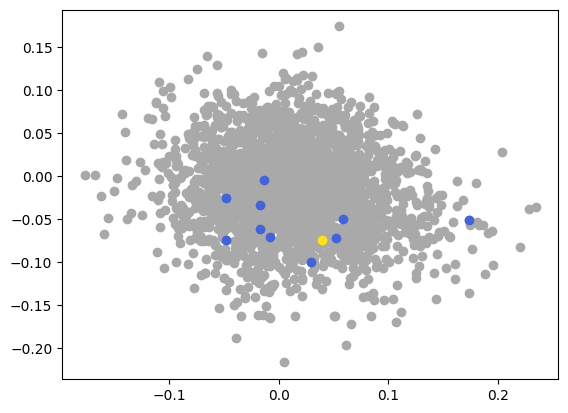

In [26]:
import matplotlib.pyplot as plt

plt.scatter(sentence_embeddings.cpu()[:,0] , sentence_embeddings.cpu()[:,1], c = '#a9a9a9')
plt.scatter(selected_sentences_embedding.cpu()[:,0] , selected_sentences_embedding.cpu()[:,1], c = '#4363d8')
plt.scatter(query_embedding.cpu()[:,0] , query_embedding.cpu()[:,1], color = '#ffe119')
plt.show()

### Testing the model

Now we have extracted the data, finetuned the model, and proved that it works once. Now we will have to prove that it works for more cases. 

Earlier we set aside 20% of the original data for testing. Becasue we are aming to create something that is working as a vector database, we want to have absolute accuracy and we are not interested in similarity. This is by we have a one-to-one comparison and not a BLEU-evaluation or similar.

In [27]:
# Get traning data
selected_sentences_testing, _ = data_division(extract_test_df, len(extract_test_df.index))

In [28]:
score = 0

for _, sentence_pair in enumerate(selected_sentences_testing):

  indexes, distances, query_embedding = search_embeddings(query=sentence_pair[0], k=1, device=device, model=model)

  results = []
  for _, i in enumerate(indexes):

    if i >= len(selected_sentences_testing):
      break

    results.append(selected_sentences_testing[i])
  

  if sentence_pair in results:
    score += 1
  
print("Accuracy:", score/len(selected_sentences_testing)*100, "%")

Accuracy: 0.0 %


Thats is quite bad, how does it look if we use the traning data?

In [29]:
score = 0

for _, sentence_pair in enumerate(selected_sentences_training):

  indexes, distances, query_embedding = search_embeddings(query=sentence_pair[0], k=1, device=device, model=model)

  results = []
  for _, i in enumerate(indexes):

    if i >= len(selected_sentences_training):
      break

    results.append(selected_sentences_training[i])
  

  if sentence_pair in results:
    score += 1
  
print("Accuracy:", score/len(selected_sentences_training)*100, "%")

Accuracy: 98.4518828451883 %


### Finding the correct Wikipedia passage

To wrap it up, we want to find the correct Wiki-passage. This will be perfomed by just finding the passage in the bigger Wiki-passage and presenting it to the user.

In [30]:
def find_article(checked_sentence:str, data_extract):

  for passage in data_extract['chosen_topic_passage']:

    extracted_passage = ""

    for line in passage:
      extracted_passage = extracted_passage + " " + line

    if extracted_passage.find(checked_sentence) == 1:
      
      return extracted_passage

In [31]:
print("Sentence found:", query_subset[0][1])

# Here the whole data_extract_train is passed in, so it is a lot of uncessesary searing. 
complete_wiki_passge = find_article(checked_sentence=query_subset[0][1], data_extract=data_extract_train)

print("Wiki-passage:", complete_wiki_passge)

Sentence found: The British Broadcasting Corporation (BBC) is a British public service broadcaster.
Wiki-passage:  The British Broadcasting Corporation (BBC) is a British public service broadcaster. Its headquarters are at Broadcasting House in London and it is the world's oldest national broadcasting organisation and the largest broadcaster in the world by number of employees. It employs over 20,950 staff in total, 16,672 of whom are in public sector broadcasting. The total number of staff is 35,402 when part-time, flexible, and fixed-contract staff are included. The BBC is established under a Royal Charter and operates under its Agreement with the Secretary of State for Culture, Media and Sport. Its work is funded principally by an annual television licence fee which is charged to all British households, companies, and organisations using any type of equipment to receive or record live television broadcasts and iPlayer catch-up. The fee is set by the British Government, agreed by Par

## Doc2Vec

In [32]:
%pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
%pip install numpy pyblas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyblas: filename=pyblas-0.0.10-py3-none-any.whl size=52460 sha256=8dfff9db2d7422d075a057489f92b026ffb390906bfe142a23ea9066f0bb5ad3
  Stored in directory: /root/.cache/pip/wheels/76/c5/67/76acf3796d4a2c1d43a7a02273e0a812bb53c7a31a258f1c47
Successfully built pyblas


In [34]:
import gensim
import scipy.linalg
from scipy.linalg import blas

### Preparing the Data

#### Preparing the training set

We first have to decide which Data we want to use to train the model aka what goal are we trying to achieve.
As we want to retrieve the correct passage for each turn we should probably train the model on the passages given and then try to retrieve the chosen passage given a sentence from the dialogue.

In [35]:
import pandas as pd

pd.DataFrame(data[0]["chosen_topic_passage"])

,0
0,Science fiction (often shortened to SF or sci-...
1,Science fiction often explores the potential c...
2,"It usually avoids the supernatural, unlike the..."
3,"Historically, science-fiction stories have had..."
4,"Science fiction is difficult to define, as it ..."
5,"Hugo Gernsback, who suggested the term ""scient..."
6,They supply knowledge... in a very palatable f...


So we want to take all the sentences from each "chosen_topic_passage" and separately use those as the training data.

In [36]:
passages = [[passage for passage in sample['chosen_topic_passage']] for sample in data]
pd.DataFrame(passages[:2])

,0,1,2,3,4,5,6
0,Science fiction (often shortened to SF or sci-...,Science fiction often explores the potential c...,"It usually avoids the supernatural, unlike the...","Historically, science-fiction stories have had...","Science fiction is difficult to define, as it ...","Hugo Gernsback, who suggested the term ""scient...",They supply knowledge... in a very palatable f...
1,Internet access is the ability of individuals ...,"Various technologies, at a wide range of speed...","Internet access was once rare, but has grown r...","In 1995, only percent of the world's populatio...","By the first decade of the 21st century, many ...","The Internet developed from the ARPANET, which...",Use by a wider audience only came in 1995 when...


Now we have a nested list of lists, let's unfold that list in a way that the nested entries of those lists are their own entries.

In [37]:
sentences = []
for i in passages:
  for entry in i:
    sentences.append(entry)
    
pd.DataFrame(sentences[:10])

,0
0,Science fiction (often shortened to SF or sci-...
1,Science fiction often explores the potential c...
2,"It usually avoids the supernatural, unlike the..."
3,"Historically, science-fiction stories have had..."
4,"Science fiction is difficult to define, as it ..."
5,"Hugo Gernsback, who suggested the term ""scient..."
6,They supply knowledge... in a very palatable f...
7,Internet access is the ability of individuals ...
8,"Various technologies, at a wide range of speed..."
9,"Internet access was once rare, but has grown r..."


Let's check our dataset for duplicates.

In [38]:
print(f"Dataset with duplicates: {len(sentences)}")

#Let's turn the list into a dictionary and then back into a list to eliminate duplicates
unique_sentences = list(dict.fromkeys(sentences))
print(f"Cleaned up Dataset: {len(unique_sentences)}")

Dataset with duplicates: 210354
Cleaned up Dataset: 12702


We reduced our dataset to 6% of the original one by removing the duplicates.

#### Preparing the test set

For the test set we need all the sentences created by the wizard which are based on sentences from Wikipedia articles aka the training set so we can then test the similarity between those sentences and the training set.
This way we want to be able to recover the sentence that was used to craft a response given by the wizard.
We should also save the actual used sentence in some dictionary linking the response and the used sentence to be able to evaluate the model

Let's take a look at the structure of the dialogue using pandas

In [39]:
import pandas as pd

df_dialog = pd.DataFrame(data[0]['dialog'][:2])
df_dialog

,speaker,text,checked_sentence,checked_passage,retrieved_passages,retrieved_topics
0,0_Wizard,I think science fiction is an amazing genre fo...,{'chosen_Science_fiction_0': 'Science fiction ...,{'chosen_topic_0_Science_fiction': 'Science fi...,[{'Hyperspace (science fiction)': ['Hyperspace...,"[Hyperspace (science fiction), Science fiction..."
1,1_Apprentice,I'm a huge fan of science fiction myself!,NaN,NaN,[{'Science fiction': ['Science fiction (often ...,"[Science fiction, History of science fiction, ..."


In [40]:
def get_value_from_dict(dictionary):
    for _, value in dictionary.items():
            return value

In [41]:
#Create dictionary with responses and chosen sentences and list with just responses
response_sentence_pairs = {}
wizard_resps = []

for dialogue in data:
  for entry in dialogue['dialog']:
    if not 'Wizard' in entry['speaker']: #the apprentice doesn't have any responses based on sentences from training set
      continue

    if get_value_from_dict(entry['checked_sentence']) == 'no_passages_used' or get_value_from_dict(entry['checked_sentence']) is None:
      continue

    extracted_text = get_value_from_dict(entry['checked_sentence'])

    response_sentence_pairs.update({entry['text']:extracted_text})
    wizard_resps.append(entry['text'])

Let's check our new dictionary.

In [42]:
dict_items = response_sentence_pairs.items()
print(list(dict_items)[:2])

[("I think science fiction is an amazing genre for anything. Future science, technology, time travel, FTL travel, they're all such interesting concepts.", 'Science fiction (often shortened to SF or sci-fi) is a genre of speculative fiction, typically dealing with imaginative concepts such as futuristic science and technology, space travel, time travel, faster than light travel, parallel universes, and extraterrestrial life.'), ('Awesome! I really love how sci-fi storytellers focus on political/social/philosophical issues that would still be around even in the future. Makes them relatable.', 'Science fiction films have often been used to focus on political or social issues, and to explore philosophical issues like the human condition.')]


Check out the list.

In [43]:
wizard_resps[:2]

["I think science fiction is an amazing genre for anything. Future science, technology, time travel, FTL travel, they're all such interesting concepts.",
 'Awesome! I really love how sci-fi storytellers focus on political/social/philosophical issues that would still be around even in the future. Makes them relatable.']

Great, now we have a list with all the responses given by the wizard and a dictionary linking all the responses to the original source sentences.

Do we have any duplicates?

In [44]:
print(f"Dataset with duplicates: {len(wizard_resps)}")

#Eliminating a few duplicates
unique_resps = list(dict.fromkeys(wizard_resps))
print(f"Cleaned up Dataset: {len(unique_resps)}")

Dataset with duplicates: 94029
Cleaned up Dataset: 93953


It seems so, but just a few. How come we have around ten times more responses, than source sentences?

#### Preprocess the Data

Let's define a function for preprocessing our data.

Note:

- Sadly simple_preprocess removes numbers which would be very useful for retrieval of very specific data.
- Also consider taking out stopwords.

In [45]:
def preprocess(data,tokens_only=False):
  for i, line in enumerate(data):
    tokens = gensim.utils.simple_preprocess(line, min_len=2, max_len=20)
    if tokens_only:
      yield tokens
    else:
      # For training data, add tags
      yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

In [46]:
train_corpus = list(preprocess(unique_sentences))
test_corpus = list(preprocess(wizard_resps,tokens_only=True))

Visualization of structure of train_corpus and test_corpus.

In [47]:
pd.DataFrame(train_corpus[:10])

,words,tags
0,"[science, fiction, often, shortened, to, sf, o...",[0]
1,"[science, fiction, often, explores, the, poten...",[1]
2,"[it, usually, avoids, the, supernatural, unlik...",[2]
3,"[historically, science, fiction, stories, have...",[3]
4,"[science, fiction, is, difficult, to, define, ...",[4]
5,"[hugo, gernsback, who, suggested, the, term, s...",[5]
6,"[they, supply, knowledge, in, very, palatable,...",[6]
7,"[internet, access, is, the, ability, of, indiv...",[7]
8,"[various, technologies, at, wide, range, of, s...",[8]
9,"[internet, access, was, once, rare, but, has, ...",[9]


In [48]:
pd.DataFrame(test_corpus[:10])

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,think,science,fiction,is,an,amazing,genre,for,anything,future,...,such,interesting,concepts,None,None,None,None,None,None,None
1,awesome,really,love,how,sci,fi,storytellers,focus,on,political,...,in,the,future,makes,them,relatable,None,None,None,None
2,it,not,quite,sci,fi,but,my,favorite,version,of,...,of,azkaban,breaks,zero,logical,rules,None,None,None,None
3,if,you,really,want,look,at,the,potential,negative,consequences,...,the,tv,show,fringe,incredibly,well,written,None,None,None
4,no,could,not,couldn,imagine,living,when,internet,access,was,...,None,None,None,None,None,None,None,None,None,None
5,it,used,to,be,restricted,but,around,the,restricted,were,...,None,None,None,None,None,None,None,None,None,None
6,yes,it,was,developed,from,government,funded,projects,to,help,...,am,so,glad,they,expanded,it,None,None,None,None
7,what,is,your,favorite,thing,to,do,with,internet,access,...,to,use,my,email,and,browse,the,world,wide,web
8,yes,perform,administrative,duties,as,pharmacy,technician,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,yes,work,directly,with,lot,of,patients,None,None,None,...,None,None,None,None,None,None,None,None,None,None


### Training the model

We instantiate a Doc2Vec model with a vector size of 50 dimensions and iterate over the training corpus 40 times

If evaluation with test set is bad, maybe try to decrease min_count to 0, so unique words are not lost

In [49]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=400)

Build a vocabulary

In [50]:
model.build_vocab(train_corpus)

Essentially, the vocabulary is a list (accessible via model.wv.index_to_key) of all of the unique words extracted from the training corpus. Additional attributes for each word are available using the model.wv.get_vecattr() method, For example, to see how many times test appeared in the training corpus:

In [51]:
print(f"Word 'obama' appeared {model.wv.get_vecattr('obama', 'count')} times in the training corpus.")

Word 'obama' appeared 2 times in the training corpus.


Train the model on the corpus (Took 1 minute with 80 epochs with cleaned up dataset)


In [52]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

### Model assessment

To assess our new model, we’ll first infer new vectors for each document of the training corpus, compare the inferred vectors with the training corpus, and then returning the rank of the document based on self-similarity

Note: *This took 6 minutes to execute with the cleaned up dataset*

In [53]:
ranks = []
second_ranks = []
for doc_id in range(len(train_corpus)):
    inferred_vector = model.infer_vector(train_corpus[doc_id].words)
    sims = model.dv.most_similar([inferred_vector], topn=len(model.dv))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])

Let’s count how each document ranks with respect to the training corpus

In [54]:
import collections

counter = collections.Counter(ranks)
print(counter)

Counter({0: 12698, 1: 2, 10980: 1, 8543: 1})


Looking at an example by picking a random document from the corpus and infer a vector from the model

In [55]:
import random

doc_id = random.randint(0, len(train_corpus) - 1)
inferred_vector = model.infer_vector(train_corpus[doc_id].words)
sims = model.dv.most_similar([inferred_vector], topn=len(model.dv))

print('Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)

for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

Document (4417): «shuttlecocks also have high top speed compared to the balls in other racquet sports»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec<dm/m,d50,n5,w5,mc2,s0.001,t3>:

MOST (4417, 0.9809912443161011): «shuttlecocks also have high top speed compared to the balls in other racquet sports»

SECOND-MOST (109, 0.626495361328125): «its headquarters are in hershey pennsylvania which is also home to hershey chocolate world»

MEDIAN (7280, 0.1876290887594223): «during the th century chinese papermaking spread to the islamic world where pulp mills and paper mills were used for money making»

LEAST (1722, -0.3127787411212921): «well known example of this is the nutcracker two act ballet originally choreographed by marius petipa and lev ivanov with music score by pyotr ilyich tchaikovsky»



Notice above that the most similar document (usually the same text) is has a similarity score approaching 1.0. However, the similarity score for the second-ranked documents should be significantly lower (assuming the documents are in fact different) and the reasoning becomes obvious when we examine the text itself.


We can run the next cell repeatedly to see a sampling other target-document comparisons.

In [56]:
import random

doc_id = random.randint(0, len(train_corpus) - 1)

# Compare and print the second-most-similar document
sim_id = second_ranks[doc_id]

print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(train_corpus[sim_id[0]].words)))

Train Document (343): «the term is often used in the entertainment business especially in business context for musicians and other performers less often for actors»

Similar Document (2319, 0.6520803570747375): «although primarily concerned with providing space to show works of visual art art galleries are sometimes used to host other artistic activities such as performance arts music concerts or poetry readings»



This doesn't really look good. Probably the sentences are too short and thus it doesn't work that well. Also omitting the numbers causes an information loss.

### Testing on single examples

In [57]:
import random

doc_id = random.randint(0, len(test_corpus) - 1)
inferred_vector = model.infer_vector(test_corpus[doc_id])
sims = model.dv.most_similar([inferred_vector], topn=len(model.dv))


# Compare and print the 10 most similar documents from the train corpus
print("Test Document ({}): «{}»\n".format(doc_id, ' '.join(test_corpus[doc_id])))

for index in range(10):
    print(f"{index+1}. {sims[index]}: «{' '.join(train_corpus[sims[index][0]].words)}»")
print("\n\n")

#Similarity score of original sentence
tokenized_sentence = gensim.utils.simple_preprocess(response_sentence_pairs[wizard_resps[doc_id]], min_len=2, max_len=20)
for index in range(len(sims)):
  if train_corpus[sims[index][0]].words == tokenized_sentence:
    print(f"Similarity of original sentence: \n{index+1}. {sims[index]}: «{' '.join(train_corpus[sims[index][0]].words)}»")

print("\n\n")
print(f"Untokenized Wizard response: {wizard_resps[doc_id]}")
print(f"Original source sentence: {response_sentence_pairs[wizard_resps[doc_id]]}")

Test Document (5486): «thor is good guy he is founding member of the superhero team you know the one the avengers»

1. (10652, 0.5278571844100952): «the contestants must first play preliminary round called fastest finger first or in the version simply fastest finger where they are all given question and four answers from the host and are asked to put those four answers into particular order in the first series of the british version and in pre episodes of the australian version the round instead required the contestants to answer one multiple choice question correctly as quickly as possible»
2. (7766, 0.5237165689468384): «one account holds that james wilson who lived in the then unnamed city offered free whiskey to anyone who would vote for the name springfield after his hometown of springfield massachusetts»
3. (11170, 0.5166019797325134): «an aunt is the wife of someone parent brother uncle and not mother of someone cousin»
4. (7526, 0.5121268033981323): «the title of the novel refe

### Evaluating model performance on subset of test data

Evaluating the accuracy of the original sentence being in the top 10 and top 20 most similar sentences with 20% of the test data (takes 2 minutes)

In [58]:
#Create test subset
test_subset_corpus = test_corpus

#counter that keeps track how often the right source sentence was in the top 10
counter_10 = 0
#counter that keeps track how often the right source sentence was in the top 20
counter_20 = 0

test_size = 0.2

for i in range(int(len(test_corpus)*test_size)):
  doc_id = i

  inferred_vector = model.infer_vector(test_subset_corpus[doc_id])

  sims = model.dv.most_similar([inferred_vector], topn=20)

  tokenized_sentence = gensim.utils.simple_preprocess(response_sentence_pairs[wizard_resps[doc_id]], min_len=2, max_len=20)
  
  for index in range(len(sims)):
    if train_corpus[sims[index][0]].words == tokenized_sentence:
      counter_20 += 1
      if index <= 10:
        counter_10 += 1

print(f"Number of test samples: {int(len(test_corpus)*test_size)} ({test_size*100}% of test set)")

print(f"Number of times sentence was in Top 10: {counter_10}")
print(f"Number of times sentence was in Top 20: {counter_20}")

print(f"Accuracy for Top 10: {100*counter_10/int(len(test_corpus)*test_size)}%")
print(f"Accuracy for Top 20: {100*counter_20/int(len(test_corpus)*test_size)}%")

Number of test samples: 18805 (20.0% of test set)
Number of times sentence was in Top 10: 4277
Number of times sentence was in Top 20: 4921
Accuracy for Top 10: 22.743951076841267%
Accuracy for Top 20: 26.168572188247808%
